<a href="https://colab.research.google.com/github/sabethasheenu/Bakery-Sales-Prediction/blob/main/Bakery_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


csv to pandas

In [3]:
#csv to pandas
bakery_data=pd.read_csv('/content/data1.csv')
bakery_data.head()


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,30-10-2016 09:58,Morning,Weekend
1,2,Scandinavian,30-10-2016 10:05,Morning,Weekend
2,2,Scandinavian,30-10-2016 10:05,Morning,Weekend
3,3,Hot chocolate,30-10-2016 10:07,Morning,Weekend
4,3,Jam,30-10-2016 10:07,Morning,Weekend


In [5]:
#no. of data points
bakery_data.shape

(20507, 5)

In [22]:
bakery_data.drop(bakery_data.index[8000:20506], inplace=True)
bakery_data.shape


(8000, 5)

In [23]:
#getting some info abt dataset
bakery_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 8001
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  8000 non-null   int64 
 1   Items          8000 non-null   object
 2   DateTime       8000 non-null   object
 3   Daypart        8000 non-null   object
 4   DayType        8000 non-null   object
dtypes: int64(1), object(4)
memory usage: 633.0+ KB


In [24]:
bakery_data.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

Data Analysis

In [25]:
bakery_data.describe()

,TransactionNo
count,8000.000000
mean,1985.608875
std,1167.206968
min,1.000000
25%,972.000000
50%,1954.500000
75%,2994.000000
max,4015.000000


In [9]:
sns.set()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


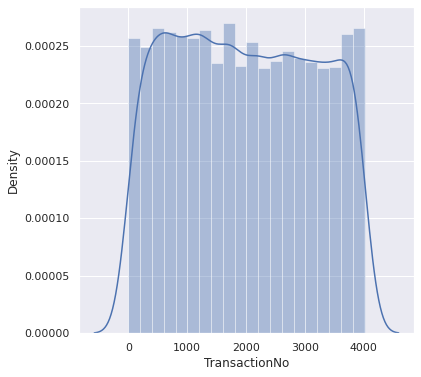

In [26]:
plt.figure(figsize = (6,6))
sns.distplot(bakery_data['TransactionNo'])
plt.show()

Categorical column

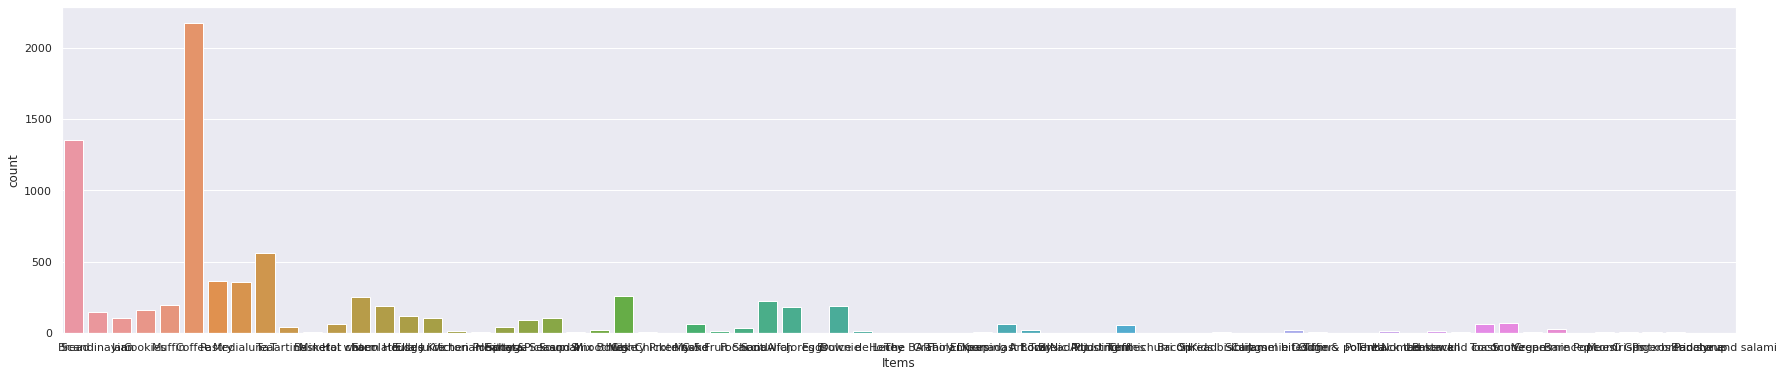

In [29]:
#item column
plt.figure(figsize=(30,6))
sns.countplot(x='Items',data=bakery_data)
plt.show()

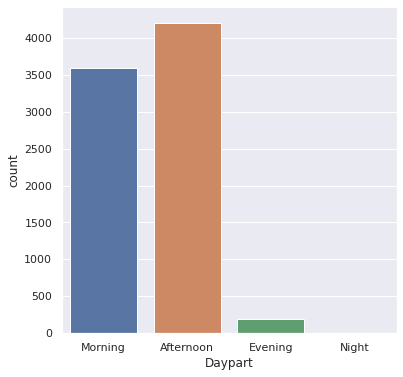

In [30]:
#daypart column
plt.figure(figsize=(6,6))
sns.countplot(x='Daypart',data=bakery_data)
plt.show()

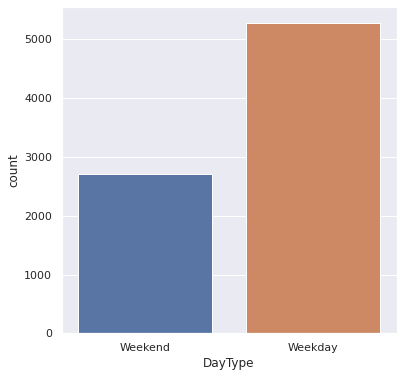

In [33]:
#item column
plt.figure(figsize=(6,6))
sns.countplot(x='DayType',data=bakery_data)
plt.show()

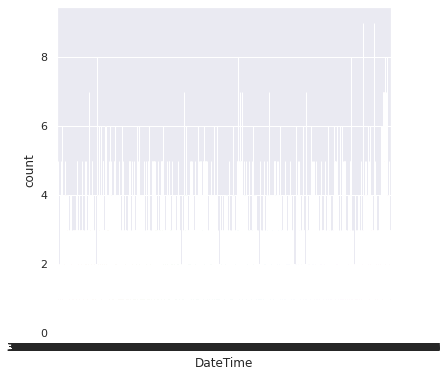

In [34]:
#item column
plt.figure(figsize=(6,6))
sns.countplot(x='DateTime',data=bakery_data)
plt.show()

In [35]:
encoder = LabelEncoder()

In [37]:
bakery_data['Items'] = encoder.fit_transform(bakery_data['Items'])
bakery_data['DateTime'] = encoder.fit_transform(bakery_data['DateTime'])
bakery_data['Daypart'] = encoder.fit_transform(bakery_data['Daypart'])
bakery_data['DayType'] = encoder.fit_transform(bakery_data['DayType'])

In [38]:
bakery_data.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,8,3576,2,1
1,2,55,3577,2,1
4,3,36,3578,2,1
5,3,18,3578,2,1
6,4,46,3579,2,1


Splitting Features And target

In [39]:
X = bakery_data.drop(columns = 'DayType',axis = 1)
Y = bakery_data['DayType']

In [40]:
print(Y)

0       1
1       1
4       1
5       1
6       1
       ..
7997    0
7998    0
7999    0
8000    0
8001    0
Name: DayType, Length: 8000, dtype: int64


Training and testing Data

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(8000, 4) (6400, 4) (1600, 4)


Model TRaining

In [43]:
regressor = XGBRegressor()

In [44]:
regressor.fit(X_train,Y_train)

[08:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [45]:
#prediction on training model
training_data_prediction = regressor.predict(X_train)

In [47]:
#R square value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R Square Value = ',r2_train)

R Square Value =  0.9815318502152005


In [50]:
#prediction on testing model
test_data_prediction = regressor.predict(X_test)
#R square value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R Square Value = ',r2_test)

R Square Value =  0.974484624694549
